### Comparing kernel matrices with different approaches

In [8]:
using Flux,LinearAlgebra,CairoMakie

In [9]:
include("DenseNTK.jl")
include("normNTK.jl")

kernel (generic function with 1 method)

We start by making a model using DenseNTK that works like Dense in Flux but is more general in a sense of calculating the kernel


In [10]:
Nh = 100
model = Chain(DenseNTK(1=>Nh,relu),DenseNTK(Nh=>1))|>f64
θ = Flux.params(model)
Nx = 40
xa = -1.0
xb = 1.0
xR = range(xa,stop=xb,length=Nx) 
x = hcat(xR...)


1×40 Matrix{Float64}:
 -1.0  -0.948718  -0.897436  -0.846154  …  0.846154  0.897436  0.948718  1.0

In [11]:

K_i = zeros(Float64,3*Nh+1,Nx)
for i = 1:Nx
    ∇_SIE = Flux.gradient(()-> model([x[i]])[1],θ)
    K_i[1:Nh,i] = ∇_SIE[θ[1]][:]
    K_i[Nh+1:2*Nh,i] = ∇_SIE[θ[2]][:]
    K_i[2*Nh+1:3*Nh,i] = ∇_SIE[θ[3]][:]
    K_i[3*Nh+1:3*Nh+1,i] = ∇_SIE[θ[4]][:] 
end

Kernel_SIE = K_i[1:3*Nh,:]'*K_i[1:3*Nh,:]
# eigen(Kernel_SIE).values

40×40 Matrix{Float64}:
 2.40503   2.34524   2.28544   2.2138    …  0.385253  0.358553  0.331853
 2.34524   2.28853   2.23183   2.16349      0.407202  0.381817  0.356431
 2.28544   2.23183   2.17822   2.11318      0.429151  0.40508   0.38101
 2.2138    2.16349   2.11318   2.06286      0.451099  0.428344  0.405588
 2.01178   1.96758   1.92338   1.87917      0.475249  0.45361   0.431972
 1.95308   1.9116    1.87012   1.82864   …  0.498845  0.478578  0.45831
 1.89848   1.85962   1.82077   1.78191      0.522442  0.503546  0.484649
 1.83715   1.80104   1.76493   1.72882      0.555047  0.536866  0.518685
 1.78286   1.74934   1.71583   1.68232      0.579969  0.563225  0.54648
 1.72856   1.69765   1.66673   1.63581      0.604892  0.589584  0.574276
 ⋮                                       ⋱                      
 0.569124  0.582636  0.596147  0.609659     1.51936   1.54625   1.57314
 0.538102  0.55305   0.567998  0.582946     1.5602    1.58942   1.61864
 0.507079  0.523464  0.539849  0.556234  

In [12]:
K = kernel(model,x)




40×40 Matrix{Float64}:
 2.40503   2.34524   2.28544   2.2138    …  0.385253  0.358553  0.331853
 2.34524   2.28853   2.23183   2.16349      0.407202  0.381817  0.356431
 2.28544   2.23183   2.17822   2.11318      0.429151  0.40508   0.38101
 2.2138    2.16349   2.11318   2.06286      0.451099  0.428344  0.405588
 2.01178   1.96758   1.92338   1.87917      0.475249  0.45361   0.431972
 1.95308   1.9116    1.87012   1.82864   …  0.498845  0.478578  0.45831
 1.89848   1.85962   1.82077   1.78191      0.522442  0.503546  0.484649
 1.83715   1.80104   1.76493   1.72882      0.555047  0.536866  0.518685
 1.78286   1.74934   1.71583   1.68232      0.579969  0.563225  0.54648
 1.72856   1.69765   1.66673   1.63581      0.604892  0.589584  0.574276
 ⋮                                       ⋱                      
 0.569124  0.582636  0.596147  0.609659     1.51936   1.54625   1.57314
 0.538102  0.55305   0.567998  0.582946     1.5602    1.58942   1.61864
 0.507079  0.523464  0.539849  0.556234  

In [ ]:
round.(K[:,:],digits=13)==round.(Kernel_SIE[:,:],digits=13)

In [ ]:
eigen(Kernel_SIE).values
λ = eigen(K).values
λ = abs.(λ)
λ = sort!(λ)



for i = 1:Nx
    if λ[i] == 0
        λ[i] = 10^(-19)
    end
end

λ

In [ ]:
fig = Figure()
ax1 = Axis(fig[1,1],yscale=log10)
s1 = CairoMakie.scatter!(ax1,λ[:],color=:red)
fig


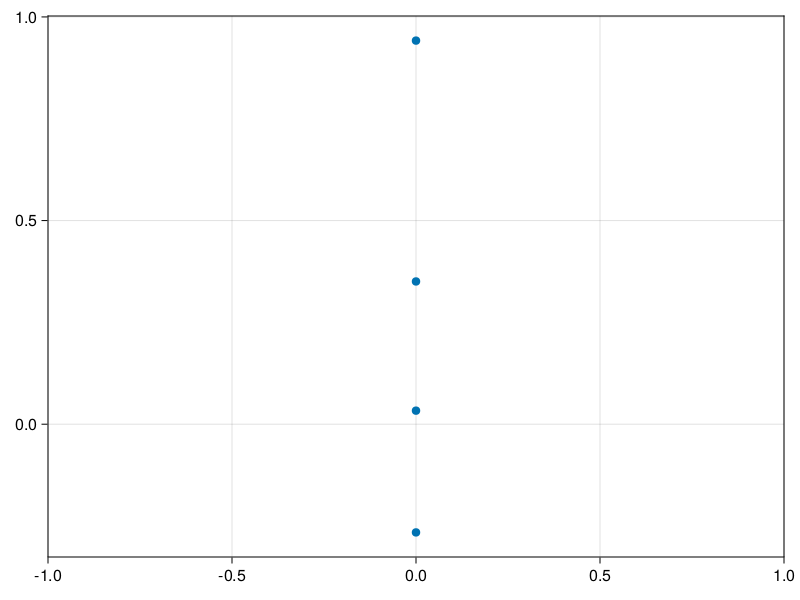

In [6]:
t = [0]
fig = Figure()
ax1 = Axis(fig[1,1])
CairoMakie.scatter!(ax1,t,θ[1][1:4])
fig



In [ ]:
x_train = x
f = x->sin(5*x)+cos(5*x)
y_train = map(f,x_train)


fig = Figure()
ax1 = Axis(fig[1,1])
CairoMakie.scatter!(ax1,x_train[:],y_train[:])
fig
